# **菊安酱与菜菜的Python机器学习可视化**

#### <font color='blue'>第六期 时间序列（Time Series）:35时间序列图 & 36带波峰波谷注释的时间序列

**注意：无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [1]:
# import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif']=['Simhei'] #显示中文
# plt.rcParams['axes.unicode_minus']=False   #显示负号

## **第六章 时间序列（Time Series）**

时间序列是典型的变化图，指的是目标变量随时间变化而呈现出不同的趋势

- **时间序列图形**通常使用折线图来绘制，也可以有其他不同的形式  
- **时间序列分析**就是分析时间序列数据，提取更多有价值的统计数据和数据的其他特征  
- **时间序列预测**即使用模型根据先前数据的值预测未来值

时间序列预测衍生出了很多的模型：   
> **自回归模型（AR模型）**:英文名称是Autoregressive model，是一种统计上处理时间序列的方法，由线性回归发展而来，只不过不是用x预测y,而是用x预测x自身，所以叫做自回归。

> **移动平均模型（MA模型）**:一个常见的对单一变量时间序列进行建模的方法。   

> **自回归滑动平均模型（ARMA模型）**:研究时间序列的一种重要方法，以自回归模型和移动平均模型为基础“混合”而成的一种模型。

> **ARIMA模型**：Autoregressive Integrated Moving Average model，差分整合移动平均自回归模型，又称整合移动平均自回归模型，是目前比较常用的一种时间序列分析模型。

当然，以上的这些时间序列模型仅做了解，今天我们要学习的重点是时间序列图形，将目标变量随时间变化的趋势用图形展示出来   

常用的时间序列图有：时间序列图、自相关图、交叉相关图……

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week6%20time%20series/%E5%85%B8%E5%9E%8B%E7%9A%84%E6%97%B6%E9%97%B4%E5%BA%8F%E5%88%97%E5%9B%BE.png'>

### 我们什么时候需要时间序列图呢？  
1. 探索性分析：<br>
>探索依托于时间进行变化的数据<br>
2. 时间序列分析：<br>
>利用各种分析方法对时间序列数据进行分析，得出更多的统计数据及更有价值的信息<br>
>比如消费模式变迁研究、长期追踪资料的研究等
3. 时间序列预测：<br>
>运用各种模型对时间序列数据进行预测，比如股票预测、具有季节变动特征的销售量、市场规模的预测等


### <font color=bule> 35/50 时间序列图（Time Series Plot）

时间序列图，可以展示目标变量随时间变化呈现的趋势

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week6%20time%20series/%E6%97%B6%E9%97%B4%E5%BA%8F%E5%88%97%E6%8A%98%E7%BA%BF%E5%9B%BE.png' width=500>

横坐标：年份  
纵坐标：数量  

### 1. 导入需要的绘图库

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#如果用jupyter notebook则需要这行代码让你的图像显示，如果是jupyterlab则不需要

### 2.认识绘制时间序列的函数（折线图）

**plt.plot**

重要参数   
> x, y：绘制折线图的数据    
> fmt：格式字符串由颜色、标记和线组成（fmt ='[color] [marker] [line]'）      
> data：带有标记数据的对象   

In [2]:
# plt.plot?

#### <font color='blue'>绘制简单的折线图

In [3]:
#构造数据,满足正态分布的1000个数
X = np.random.randn(10)

In [4]:
X

array([ 1.44608445, -0.42330622, -0.69287344, -0.05677885, -0.68199035,
        0.45403786, -1.50951733, -1.51819073, -0.98366885,  0.92811666])

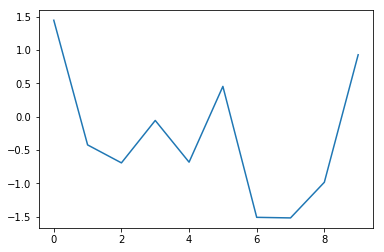

In [5]:
#画一个简单的折线图
plt.plot(X);

### 3.认识所用数据集

该数据集是R中内置数据集之一，数据内容是1949-1960年间某航空公司每月的乘客数量   

更多的R内置数据集下载走这里：https://blog.csdn.net/c1z2w3456789/article/details/50983713

In [6]:
#导入数据
data = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

In [7]:
data.head(3)

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132


In [8]:
data.shape

(144, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
date     144 non-null object
value    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


#### 【注意】遇到日期型数据或者形似日期型数据都需要格外注意   
这里的date应该是日期型数据，但是是以文本型数据存储在数据集中，如果要当做日期型数据来使用的话，需要将其类型转换为日期型

### 将文本型数据转换为日期型

#### 方法一：在导入数据集的时候设置parse_dates参数（注意：此参数必须是列表或者布尔型）

In [10]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv',parse_dates=['date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
date     144 non-null datetime64[ns]
value    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


#### 方法二：数据导入之后更改数据类型——pd.to_datetime()

In [12]:
df1 = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

In [13]:
df1.head(3)

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
date     144 non-null object
value    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [15]:
df1['date'] = pd.to_datetime(df1.date)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
date     144 non-null datetime64[ns]
value    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


#### 方法三：数据导入之后转换数据类型——datetime.datetime.strptime()

In [18]:
df2 = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
date     144 non-null object
value    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [20]:
import datetime as dt

In [21]:
df2.date[0]

'1949-01-01'

In [22]:
dt.datetime.strptime(df2.date[0],'%Y-%m-%d')

datetime.datetime(1949, 1, 1, 0, 0)

In [23]:
df2['date'] = df2['date'].apply(lambda x:dt.datetime.strptime(x, "%Y-%m-%d"))

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
date     144 non-null datetime64[ns]
value    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


### 4.绘制时间序列图   

In [25]:
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


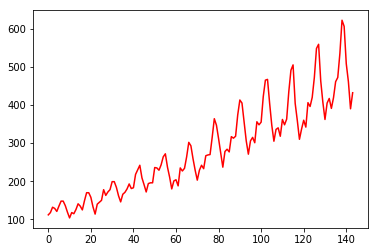

In [26]:
#绘制时间序列折线图
plt.plot(df.value,color='r');

其实，时间序列图非常的简单，我们一行代码基本上就把图形画出来了……

接下来，我们再稍微修饰一下图形

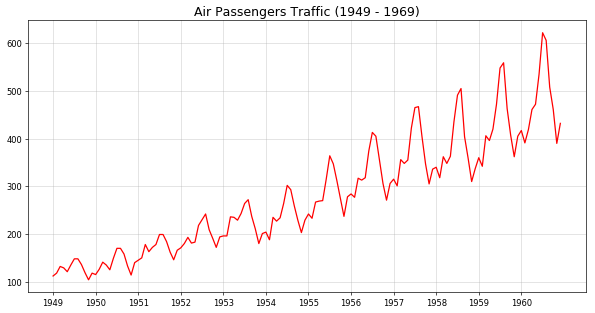

In [27]:
#创建画布并设定画布大小
plt.figure(figsize=(12,6),dpi=60)

#绘制折线图
plt.plot(df.value,color='r')

#添加装饰
plt.title('Air Passengers Traffic (1949 - 1969)',fontsize=15)
plt.xticks(range(df.shape[0])[::12],df.date.dt.year[::12])
plt.grid(alpha=.5);

到这里，仅仅用了5行代码，我们就把时间序列图画出来啦~~~~    
但是！！！请看下面的源代码……

In [ ]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'traffic', data=df, color='tab:red')

# Decoration
plt.ylim(50, 750)
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-4:] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1960)", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

### <font color='bule'> 源代码竟然有这么长，宝宝表示很震惊…………

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week6%20time%20series/shock%20dog.jpg'>

源代码中有两处错误，这里已经修正：   
（1）df数据集中列名分别为date/value,没有traffic    
（2）关于x轴刻度，如果想要保留字符串前4位作为年份，应该是x[:4],而不是[-4:]

下面我们一起来看一下源代码是如何画时间序列图的~

In [29]:
#源代码(修正版)

# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv') #导入数据集

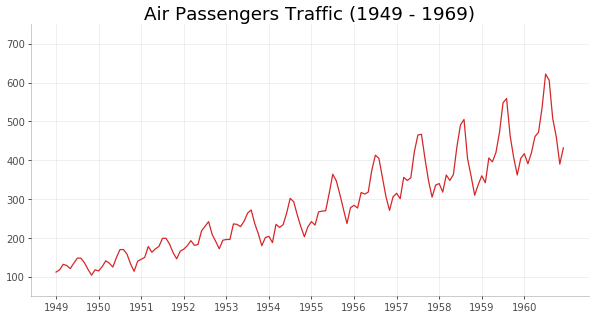

In [30]:
# Draw Plot
plt.figure(figsize=(12,6), dpi= 60) #创建画布并设定画布大小
plt.plot('date', 'value', data=df, color='tab:red') #绘制折线图

# Decoration
plt.ylim(50, 750)   #设定y轴刻度范围
xtick_location = df.index.tolist()[::12]  #每12个索引提取一个
xtick_labels = [x[:4] for x in df.date.tolist()[::12]] #df日期列每12个提取一个
plt.xticks(ticks=xtick_location, labels=xtick_labels #人为将x轴刻度稀疏化，并且设定年份作为刻度标签
           ,rotation=0   #rotation指的是刻度标签旋转的角度，默认为 0度
           ,fontsize=12  #设定刻度字体大小
           ,horizontalalignment='center' #设定水平对齐方式，可选项为left/right/center,默认为center
           ,alpha=.7     #设定刻度标签的透明度，默认为1（此参数并不会改变轴的透明度）
          )

plt.yticks(fontsize=12, alpha=.7) #设定y轴刻度标签大小和透明度
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22) #添加图标标题
plt.grid(axis='both', alpha=.3) #配置网格线，并设定网格线透明度,axis的可选项有x/y/both(默认为both)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    #获取当前子图，并设定上边框透明度为0,相当于去掉了上边框
plt.gca().spines["bottom"].set_alpha(0.3) #弱化下边框的颜色
plt.gca().spines["right"].set_alpha(0.0)  #去掉右边框  
plt.gca().spines["left"].set_alpha(0.3)   #弱化左边框的颜色
plt.show()  #本地显示图形，可用分号;代替

#### ※绘制折线图的另一种设定方式 

将全部数据赋值给data参数，然后从中挑选出绘图所需的数据   

In [31]:
m = pd.DataFrame({'m':np.arange(2,21,2),'n':np.random.rand(10),'l':np.random.randn(10)})

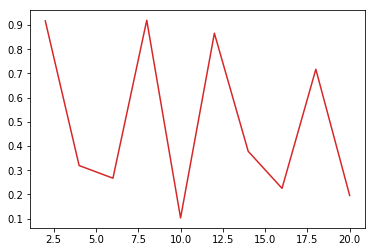

In [32]:
plt.plot('m', 'n', data=m, color='tab:red');

#tab:red——是“T10”分类调色板中的Tableau颜色
#共10种：{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
#'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'}

这里的color设定参考Matplotlib官网说明：https://matplotlib.org/users/colors.html

### 5. 图像解读

- 从1949年到1960年该航空公司的乘客人数逐年上涨
- 每年的乘客人数呈现出了季节性趋势：年中出现高峰

### <font color=bule> 36/50 带波峰波谷注释的时间序列图（Time Series with Peaks and Troughs Annotated）  

这个图就是在简单的时间序列图上添加了一些注释，能够突出特殊的部分

<img src='http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week6%20time%20series/%E5%B8%A6%E6%B3%A2%E5%B3%B0%E6%B3%A2%E8%B0%B7%E6%A0%87%E8%AE%B0%E7%9A%84%E6%97%B6%E9%97%B4%E5%BA%8F%E5%88%97.png' width=600>

横坐标：年份和月份   
纵坐标：乘客数量    
图例：乘客数量、波峰、波谷

### 1.导入相应的绘图包

In [33]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 2.认识绘制带注释的时间序列图函数

**plt.plot**   
- 函数功能：绘制折线图   
> 重要参数:   
>> x, y：绘制折线图的数据    
>> fmt：格式字符串由颜色、标记和线组成（fmt ='[color] [marker] [line]'）      
>> data：带有标记数据的对象  

**plt.annotate**
- 函数功能：添加注释
> 重要参数   
>> s：注释的文本内容   
>> xy：注释的起始位置   
>> xytext：文本的起始位置    
>> xycoords：xy坐标系(默认使用被注释对象的坐标轴，即xycoords='data')    
>> arrowprops: 用来设置箭头   
>> facecolor: 设置箭头的颜色   
>> headlength: 箭头的头的长度   
>> headwidth: 箭头的宽度   
>> width: 箭身的宽度   

**plt.text**
> 重要参数  
>> x,y：文本放置的位置坐标   
>> s：文本的内容   
>> horizontalalignment：水平对齐控制参数（center/left/right三种可选）   
>> verticalalignment：垂直对齐控制参数（'top', 'bottom', 'center', 'baseline', 'center_baseline'五种可选） 

关于annotate相关参考matplotlib官网资料：https://matplotlib.org/tutorials/text/annotations.html?highlight=boxstyle  
之前在12发散型文本图中讲过plt.text   
在13棒棒糖图中也讲过plt.annotate


### 3.导入数据集

In [34]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

In [35]:
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
date     144 non-null object
value    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


### 4.绘制目标图形

#### 首先绘制简单的时间序列图

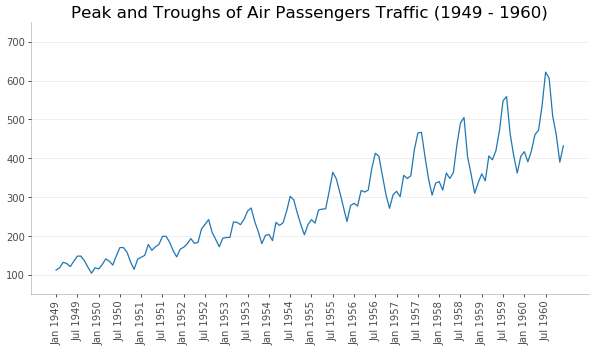

In [39]:
#创建画布并设定画布大小
plt.figure(figsize=(12,6),dpi=60)

#绘制时间序列图
plt.plot(df.date,df.value)

#去掉上边框和右边框，虚化左边框和下边框
plt.gca().spines['top'].set_alpha(.0)
plt.gca().spines['right'].set_alpha(.0)
plt.gca().spines['bottom'].set_alpha(.3)
plt.gca().spines['left'].set_alpha(.3)

#添加装饰
plt.title('Peak and Troughs of Air Passengers Traffic (1949 - 1960)',fontsize=20)
plt.ylim(50,750)
plt.yticks(fontsize=12, alpha=.7)
df['date1'] = pd.to_datetime(df.date)
xtlabel = [str(m)[:3]+' '+str(y) for y,m in zip(df.date1.dt.year,df.date1.dt.month_name())][::6]
plt.xticks(df.index.tolist()[::6],xtlabel,rotation=90,fontsize=12, alpha=.7)
plt.grid(axis='y',alpha=.3);

基本的时间序列折线图已经绘制完毕，接下来就可以添加注释了~

#### 添加注释

In [35]:
#首先我们需要把波峰和波谷分别找出来
#当数据不再增加（开始减小）的时候，即出现波峰，也就是与前一个数据相比增长为负的那个点即为波峰
#同理，当数据不再减小（开始增大）的时候，出现波谷

**np.diff()**   
函数功能是计算指定轴的离差值   
重要参数：
> a:输入数据  
> n:值的差异次数，默认n=1  
> axis:指定轴，默认-1，最后一个轴

In [40]:
#以数据集中乘客数为例
df.value[:5]

0    112
1    118
2    132
3    129
4    121
Name: value, dtype: int64

In [41]:
np.diff(df.value,n=1) #后一个数减去前一个数的差值，并将差值放在前一个数的位置

array([   6,   14,   -3,   -8,   14,   13,    0,  -12,  -17,  -15,   14,
         -3,   11,   15,   -6,  -10,   24,   21,    0,  -12,  -25,  -19,
         26,    5,    5,   28,  -15,    9,    6,   21,    0,  -15,  -22,
        -16,   20,    5,    9,   13,  -12,    2,   35,   12,   12,  -33,
        -18,  -19,   22,    2,    0,   40,   -1,   -6,   14,   21,    8,
        -35,  -26,  -31,   21,    3,  -16,   47,   -8,    7,   30,   38,
         -9,  -34,  -30,  -26,   26,   13,   -9,   34,    2,    1,   45,
         49,  -17,  -35,  -38,  -37,   41,    6,   -7,   40,   -4,    5,
         56,   39,   -8,  -50,  -49,  -35,   35,    9,  -14,   55,   -8,
          7,   67,   43,    2,  -63,  -57,  -42,   31,    4,  -22,   44,
        -14,   15,   72,   56,   14, -101,  -45,  -49,   27,   23,  -18,
         64,  -10,   24,   52,   76,   11,  -96,  -56,  -45,   43,   12,
        -26,   28,   42,   11,   63,   87,  -16,  -98,  -47,  -71,   42],
      dtype=int64)

In [42]:
np.diff(df.value,n=2)

array([   8,  -17,   -5,   22,   -1,  -13,  -12,   -5,    2,   29,  -17,
         14,    4,  -21,   -4,   34,   -3,  -21,  -12,  -13,    6,   45,
        -21,    0,   23,  -43,   24,   -3,   15,  -21,  -15,   -7,    6,
         36,  -15,    4,    4,  -25,   14,   33,  -23,    0,  -45,   15,
         -1,   41,  -20,   -2,   40,  -41,   -5,   20,    7,  -13,  -43,
          9,   -5,   52,  -18,  -19,   63,  -55,   15,   23,    8,  -47,
        -25,    4,    4,   52,  -13,  -22,   43,  -32,   -1,   44,    4,
        -66,  -18,   -3,    1,   78,  -35,  -13,   47,  -44,    9,   51,
        -17,  -47,  -42,    1,   14,   70,  -26,  -23,   69,  -63,   15,
         60,  -24,  -41,  -65,    6,   15,   73,  -27,  -26,   66,  -58,
         29,   57,  -16,  -42, -115,   56,   -4,   76,   -4,  -41,   82,
        -74,   34,   28,   24,  -65, -107,   40,   11,   88,  -31,  -38,
         54,   14,  -31,   52,   24, -103,  -82,   51,  -24,  113],
      dtype=int64)

In [43]:
np.diff(df.value,n=3)

array([ -25,   12,   27,  -23,  -12,    1,    7,    7,   27,  -46,   31,
        -10,  -25,   17,   38,  -37,  -18,    9,   -1,   19,   39,  -66,
         21,   23,  -66,   67,  -27,   18,  -36,    6,    8,   13,   30,
        -51,   19,    0,  -29,   39,   19,  -56,   23,  -45,   60,  -16,
         42,  -61,   18,   42,  -81,   36,   25,  -13,  -20,  -30,   52,
        -14,   57,  -70,   -1,   82, -118,   70,    8,  -15,  -55,   22,
         29,    0,   48,  -65,   -9,   65,  -75,   31,   45,  -40,  -70,
         48,   15,    4,   77, -113,   22,   60,  -91,   53,   42,  -68,
        -30,    5,   43,   13,   56,  -96,    3,   92, -132,   78,   45,
        -84,  -17,  -24,   71,    9,   58, -100,    1,   92, -124,   87,
         28,  -73,  -26,  -73,  171,  -60,   80,  -80,  -37,  123, -156,
        108,   -6,   -4,  -89,  -42,  147,  -29,   77, -119,   -7,   92,
        -40,  -45,   83,  -28, -127,   21,  133,  -75,  137], dtype=int64)

**np.sign**   
函数功能：返回输入数据的符号（-1 if x < 0, 0 if x==0, 1 if x > 0）

In [44]:
# np.sign(5)

In [45]:
# np.sign(-5)

In [46]:
# np.sign(0)

寻找波峰和波谷

In [47]:
#一次求离差
np.sign(np.diff(df.value))

array([ 1,  1, -1, -1,  1,  1,  0, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1,  0, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  0, -1, -1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  0,  1, -1,
       -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,
        1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,
        1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,
        1,  1, -1, -1, -1, -1,  1], dtype=int64)

In [48]:
#二次求离差
np.diff(np.sign(np.diff(df.value)))

array([ 0, -2,  0,  2,  0, -1, -1,  0,  0,  2, -2,  2,  0, -2,  0,  2,  0,
       -1, -1,  0,  0,  2,  0,  0,  0, -2,  2,  0,  0, -1, -1,  0,  0,  2,
        0,  0,  0, -2,  2,  0,  0,  0, -2,  0,  0,  2,  0, -1,  1, -2,  0,
        2,  0,  0, -2,  0,  0,  2,  0, -2,  2, -2,  2,  0,  0, -2,  0,  0,
        0,  2,  0, -2,  2,  0,  0,  0,  0, -2,  0,  0,  0,  2,  0, -2,  2,
       -2,  2,  0,  0, -2,  0,  0,  0,  2,  0, -2,  2, -2,  2,  0,  0,  0,
       -2,  0,  0,  2,  0, -2,  2, -2,  2,  0,  0,  0, -2,  0,  0,  2,  0,
       -2,  2, -2,  2,  0,  0,  0, -2,  0,  0,  2,  0, -2,  2,  0,  0,  0,
        0, -2,  0,  0,  0,  2], dtype=int64)

In [49]:
data = df['value'].values
doublediff = np.diff(np.sign(np.diff(data)))

In [50]:
np.where(doublediff == -2)[0]
#-2代表着数据是先增大后减小，所以这里应该是一个波峰，需要注意的是np.diff返回的结果是差值放在前一个数的位置上，那真正的波峰应该是后一个位置

array([  1,  10,  13,  25,  37,  42,  49,  54,  59,  61,  65,  71,  77,
        83,  85,  89,  95,  97, 102, 107, 109, 114, 119, 121, 126, 131,
       137], dtype=int64)

##### 以前5个数为例，帮助我们理解

In [51]:
df.value[:5] 
#前5个数中，波峰应该是132，它的索引是2，而上面我们找到的-2所在的索引是1，所以应该-2所在索引＋1即为真正波峰所在位置

0    112
1    118
2    132
3    129
4    121
Name: value, dtype: int64

In [52]:
np.where(doublediff == 2)[0]
#同样，2代表着数据是先减少后增加，所以应该是波谷，但真正的波谷应该是2所在索引+1

array([  3,   9,  11,  15,  21,  26,  33,  38,  45,  51,  57,  60,  62,
        69,  72,  81,  84,  86,  93,  96,  98, 105, 108, 110, 117, 120,
       122, 129, 132, 141], dtype=int64)

#### 添加波峰波谷

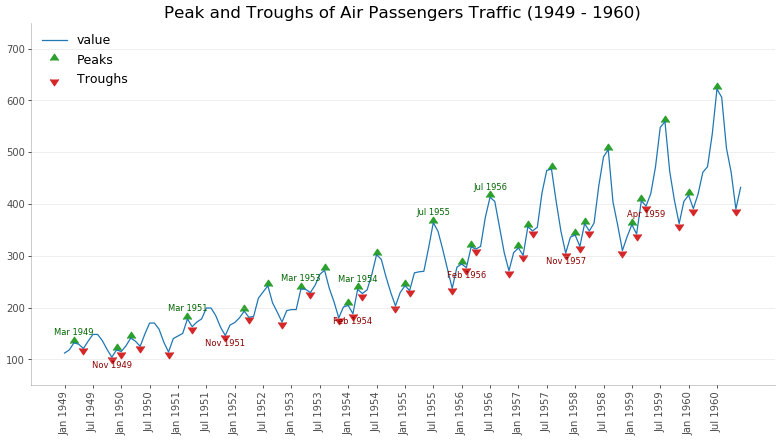

In [63]:
#创建画布并设定画布大小
plt.figure(figsize=(16,8),dpi=60)
#生成X轴刻度标签
df['date1'] = pd.to_datetime(df.date)
xtlabel = [str(m)[:3]+' '+str(y) for y,m in zip(df.date1.dt.year,df.date1.dt.month_name())]

#找到波峰波谷的位置
data = df['value'].values  #提取数据
doublediff = np.diff(np.sign(np.diff(data)))  #计算二次离差
peak_locations = np.where(doublediff == -2)[0] + 1  #波峰位置
trough_locations = np.where(doublediff == 2)[0] + 1 #波谷位置

#绘制时间序列图
plt.plot(df.date,df.value)
#添加波峰波谷
plt.scatter(df.date[peak_locations], df.value[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.date[trough_locations],df.value[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

#添加波峰波谷的注释
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p], df.value[p]+15, xtlabel[p], horizontalalignment='center', color='darkgreen') #波峰的注释
    plt.text(df.date[t], df.value[t]-20, xtlabel[t], horizontalalignment='center', color='darkred')   #波谷的注释

#去掉上边框和右边框，虚化左边框和下边框
plt.gca().spines['top'].set_alpha(.0)
plt.gca().spines['right'].set_alpha(.0)
plt.gca().spines['bottom'].set_alpha(.3)
plt.gca().spines['left'].set_alpha(.3)

#添加装饰
plt.title('Peak and Troughs of Air Passengers Traffic (1949 - 1960)',fontsize=20)
plt.ylim(50,750)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(df.index.tolist()[::6],xtlabel[::6],rotation=90,fontsize=12, alpha=.7)
plt.legend(loc=2,frameon=False,fontsize=15)
plt.grid(axis='y',alpha=.3);

关于markers形状可参考：https://matplotlib.org/api/markers_api.html

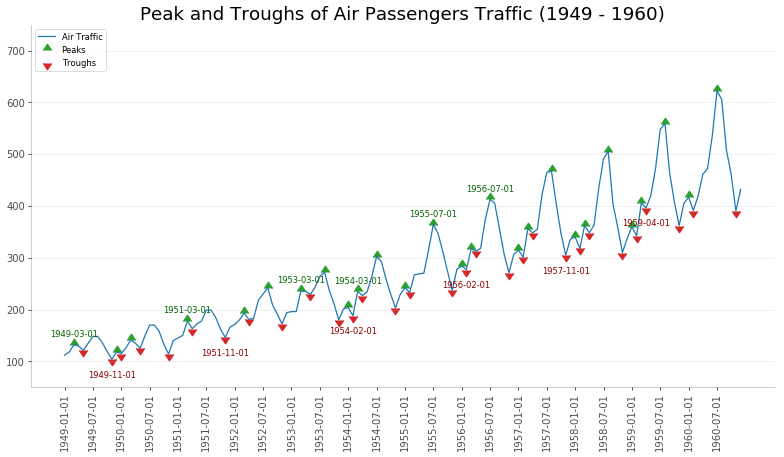

In [64]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

# Get the Peaks and Troughs
data = df['value'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16,8), dpi= 60)
plt.plot('date', 'value', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.date[peak_locations], df.value[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.date[trough_locations], df.value[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p], df.value[p]+15, df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.value[t]-35, df.date[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1960)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

### 5.图像解读